In [1]:
import msprime
import tskit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import scipy.linalg
import matplotlib
import csv
import random
from itertools import groupby
import collections
from scipy.special import gamma, factorial

In [2]:
from scipy import stats

In [3]:
plt.style.use('seaborn-talk')
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['ytick.major.size'] = 10

### Creating 2-D Toroidal Migration Matrix and Setting Variables

In [4]:
def migration_matrix_2d(length, migration_rate):
    result=[ [0]*length**2 for i in range(length**2)]
    for i in range(length**2):
        for j in range(length**2):
            #print(i)
            #left edge cases
            if i == 0:
                result[i][i+1]= migration_rate
                result[i][length]=migration_rate
            elif i==(length*(length-1)):
                result[i][i-length]= migration_rate
                result[i][i+1]=migration_rate
            elif i%length==0 :
                result[i][i-length]= migration_rate
                result[i][i+1]=migration_rate
                result[i][i+length]=migration_rate
                
            #right edge cases 
            elif i==length-1:
                result[i][i-1]=migration_rate
                result[i][i+length]=migration_rate
            elif i==(length**2-1):
                result[i][i-length]= migration_rate
                result[i][i-1]=migration_rate
            elif (i+1)%length==0 :
                result[i][i-length]= migration_rate
                result[i][i-1]=migration_rate
                result[i][i+length]=migration_rate
                
            
            #top and bottom edge cases
            elif 0< i <length-1:
                result[i][i-1]= migration_rate
                result[i][i+1]=migration_rate
                result[i][i+length]=migration_rate
            elif (length)*(length-1) < i < length**2-1:
                result[i][i-1]= migration_rate
                result[i][i+1]=migration_rate
                result[i][i-length]=migration_rate
                
            #inner nodes
            else:
                result[i][i-1]= migration_rate
                result[i][i+1]=migration_rate
                result[i][i-length]=migration_rate
                result[i][i+length]=migration_rate
                
                
                
                
                
            
    return result
print(migration_matrix_2d(5,1))

[[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [5]:
Deme_density = 10
L = 900 #the number of demes 
deme_sample_size = Deme_density #deme sample size = 40
trials = 50 #number of trials
m=0.005
total_sample_size = int(L * deme_sample_size) # total sample size
matrix = migration_matrix_2d(int(np.sqrt(L)), m/4)


population_configurations = L * [msprime.PopulationConfiguration(deme_sample_size)]

print("we want 1 <<< m*deme_density ")
print("1 <<< ",m*Deme_density )
    
#print(matrix)

we want 1 <<< m*deme_density 
1 <<<  0.05


### Running Simulations 

In [6]:
afs2 = []
for i in range(50):
    ts = msprime.simulate(Ne=Deme_density, population_configurations=population_configurations, migration_matrix=matrix)


    afs1 = ts.allele_frequency_spectrum(mode="branch", polarised=True, span_normalise=False)
    
    afs2.append(afs1)

    
    print("iteration",i)
    
afs = np.mean(afs2, 0)  

The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 0


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 1


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 2


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 3


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 4


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 5


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 6


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 7


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 8


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 9


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 10


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 11


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 12


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 13


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 14


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 15


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 16


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 17


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 18


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 19


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 20


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 21


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 22


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 23


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 24


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 25


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 26


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 27


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 28


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 29


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 30


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 31


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 32


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 33


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 34


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 35


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 36


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 37


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 38


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 39


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 40


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 41


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 42


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 43


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 44


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 45


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 46


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 47


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 48


The provenance information for the resulting tree sequence is 2.46MB. This is nothing to worry about as provenance is a good thing to have, but if you want to save this memory/storage space you can disable provenance recording by setting record_provenance=False


iteration 49


In [7]:
def smooth(x, threshold=100, rescale=2):
    return [np.mean(x[max(i - (rescale * i) // threshold, 0) : min(i + 1 + (rescale * i) // threshold, len(x))]) for i in range(len(x))]

In [8]:
def smooth_sem(x, threshold, rescale):
        return [stats.sem(x[max(i - (rescale * i) // threshold, 0) : min(i + 1 + (rescale * i) // threshold, len(x))]) for i in range(len(x))]


In [9]:
m_1=m/2
m_2=m/2
m_t=m_1+m_2
Effective_pop = (L)/(m_t)
print("The effective population size via Maruyama equation is: ", Effective_pop)
real_pop = L*Deme_density
print("The real population size is", real_pop)

# Since we're using branch lengths, the mutation rate is 1
Theta_eff = 4 * Effective_pop
Theta_real = 4 * real_pop




The effective population size via Maruyama equation is:  180000.0
The real population size is 9000


In [10]:
std_data=np.std(smooth(afs[1:], threshold=1000, rescale=200))
error=std_data/np.sqrt(len(smooth(afs[1:], threshold=1000, rescale=200)))

In [11]:
transition_freq=max(Deme_density,(m*Deme_density**2))/total_sample_size
print(transition_freq)

0.0011111111111111111


In [12]:
thresh=1000
scale=200

In [13]:
err=np.array(smooth_sem(afs[1:], threshold=thresh, rescale=scale))

C:\Users\arani\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\arani\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'SNP Count')

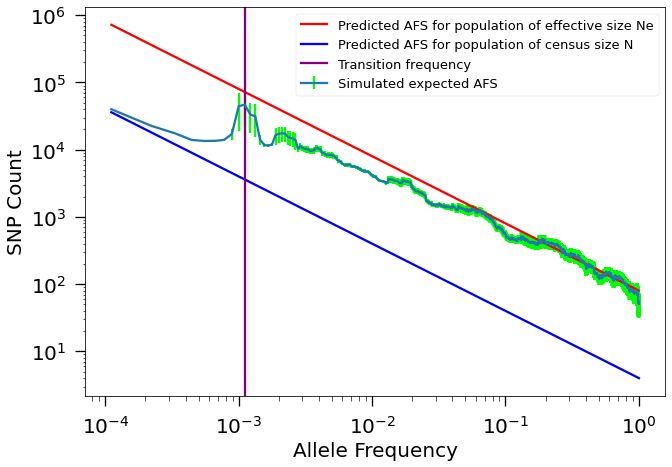

In [14]:
plt.loglog(np.arange(1,total_sample_size+1)/(total_sample_size+1), Theta_eff / np.arange(1,total_sample_size+1), color="red")
plt.loglog(np.arange(1,total_sample_size+1)/(total_sample_size+1), Theta_real / np.arange(1,total_sample_size+1), color="blue")
#plt.loglog(np.arange(1, total_sample_size+1)/(total_sample_size+1),smooth(afs[1:], threshold=1000, rescale=200), color="green") 
plt.axvline(transition_freq,color='purple')
#plt.axvline(0.2,color="orange")

plt.errorbar(np.arange(1, total_sample_size+1)/total_sample_size,smooth(afs[1:], threshold=thresh, rescale=scale), yerr=err, ecolor="lime")
plt.legend(["Predicted AFS for population of effective size Ne", "Predicted AFS for population of census size N" , 'Transition frequency', 'Simulated expected AFS'], loc ="upper right")
plt.xlabel("Allele Frequency")
plt.ylabel("SNP Count")


### Producing Wright-Fisher Fit

In [15]:
a=[]
y=np.arange(1,total_sample_size)/total_sample_size
for i in range (len(y)):
    if np.min(y)<=y[i]<=transition_freq:
        a.append(y[i])
b=np.array(a)
print(b)
len(b)

[0.00011111 0.00022222 0.00033333 0.00044444 0.00055556 0.00066667
 0.00077778 0.00088889 0.001      0.00111111]


10

In [16]:
x=np.array(b)*1/(np.max(b))
print(x)
len(x)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


10

In [17]:
N=total_sample_size*transition_freq
u=m ## Migration rate taken as the effective mutation rate of the mutant A1 to the wild type A2
v=0 ## Mutation rate of wild type A2 to mutant A1
Beta_1=2*N*u
Beta_2=2*N*v
#print(Beta_1)
#print(Beta_2)
print(Beta_1)

0.1


In [18]:
numerator=scipy.special.gamma(2*Beta_1+2*Beta_2)
denominator=scipy.special.gamma(2*Beta_1)*scipy.special.gamma(2*Beta_2)

gamma_coefficient=1

In [19]:
frequency_value=(x**(2*Beta_2-1))*((1-x)**(2*Beta_1-1))

## Setting up the frequency/x part of the equation
print(frequency_value)

[10.87942625  5.97720312  4.43404721  3.76200188  3.48220225  3.4689717
  3.74287184  4.5298729   7.01063716         inf]


<ipython-input-19-0f5209aa8ca7>:1: RuntimeWarning: divide by zero encountered in power
  frequency_value=(x**(2*Beta_2-1))*((1-x)**(2*Beta_1-1))


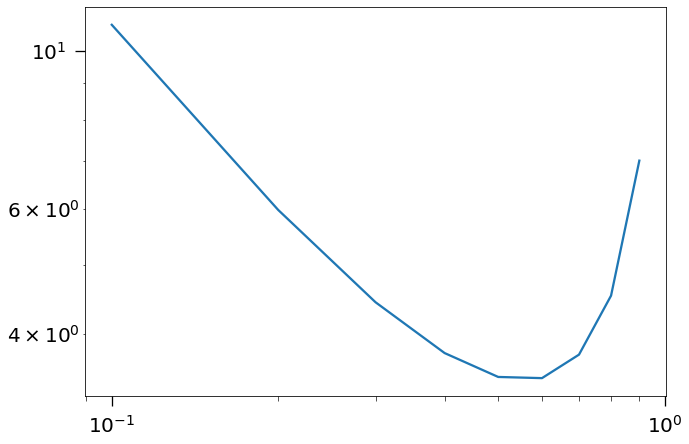

In [20]:
Effective_dist=gamma_coefficient*frequency_value
#max(Effective_dist)
plt.loglog(x,Effective_dist)

In [21]:
e=np.linspace(1/total_sample_size,transition_freq,len(x))
print(e)
len(e)

[0.00011111 0.00022222 0.00033333 0.00044444 0.00055556 0.00066667
 0.00077778 0.00088889 0.001      0.00111111]


10

In [ ]:
Effective_dist=gamma_coefficient*frequency_value
#max(Effective_dist)
plt.loglog(e,Effective_dist)

In [ ]:
plt.loglog(np.arange(1,total_sample_size)/total_sample_size, Theta_eff / np.arange(1,total_sample_size), color="red")
plt.loglog(np.arange(1,total_sample_size)/total_sample_size, Theta_real / np.arange(1,total_sample_size), color="blue")
plt.loglog(e,Effective_dist)


In [ ]:
eff_data=Theta_real / np.arange(1,total_sample_size)
pre_factor=eff_data[0]/Effective_dist[0]

In [ ]:
AF_xpoints = np.arange(1,total_sample_size+1)/(total_sample_size)
np.savetxt('2D_AF_xpoints_mrholess.csv', AF_xpoints, delimiter=',')

Maruyama_effective_ydata = Theta_eff / np.arange(1,total_sample_size+1)
np.savetxt('2D_Maruyama_effective_ydata_mrholess.csv', Maruyama_effective_ydata, delimiter=',')

Maruyama_census_ydata = Theta_real / np.arange(1,total_sample_size+1)
np.savetxt('2D_Maruyama_census_ydata_mrholess.csv', Maruyama_census_ydata, delimiter=',')

Simulated_data = smooth(afs[1:], threshold=thresh, rescale=scale)
np.savetxt('2D_Simulated_data_mrholess.csv', Simulated_data , delimiter=',')

error_data = np.array(smooth_sem(afs[1:], threshold=thresh, rescale=scale))
np.savetxt('2D_Simulated_data_mrholess.csv', Simulated_data , delimiter=',')

transition_frequency=max(Deme_density,(m*Deme_density**2))/total_sample_size


bi_directional_prediction = pre_factor*Effective_dist
np.savetxt('2D_bi_directional_prediction_mrholess.csv', bi_directional_prediction , delimiter=',')


scaled_x_bidirection_points=e
np.savetxt('2D_scaled_x_bidirection_points_mrholess.csv', scaled_x_bidirection_points , delimiter=',')


In [ ]:
plt.loglog(AF_xpoints, Maruyama_effective_ydata, color="red", label =r"Predicted AFS for population of effective size $N_e=\dfrac{L^2}{m}$") 
plt.loglog(AF_xpoints, Maruyama_census_ydata, color="blue", label =r"Predicted AFS for population of census size $ N=\rho L^2 $" )
#plt.loglog(np.arange(1, total_sample_size+1)/(total_sample_size+1), smooth(afs[1:], threshold=1000, rescale=200), color="green") 
plt.axvline(transition_frequency,color='purple', linestyle = '--')
plt.text(0.000078,1000,r"Transition frequency = $\dfrac{1}{L}$",fontsize='12')
plt.loglog(scaled_x_bidirection_points ,bi_directional_prediction,"orange", label ='Bi-directional migration prediction' )
plt.errorbar(AF_xpoints,Simulated_data, yerr=err, ecolor="lime", label = "Simulated expected AFS")
#plt.axvline(0.25)
plt.xlabel("Allele frequency")
plt.ylabel('SNP count')
#plt.legend([r"Predicted AFS for population of effective size $N_e=\frac{L^2}{m}$", r"Predicted AFS for population of census size $ N=\rho L^2 $", r'Transition frequency $= \frac{1}{L}$', "W-F fit","Simulated expected AFS" ], loc ="upper right")
plt.legend(prop={"size":10.5},loc="upper right")
plt.ylim(10**1.5, 10**5)
plt.savefig("2D_afs2.pdf")